# Install the neattext library to handle text processing tasks

In [2]:
!pip install neattext

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 3.8 MB/s eta 0:00:00


# Importing Libraries


In [1]:

# Importing essential libraries and packages for data processing, text cleaning, and machine learning tasks.

# Data manipulation and analysis libraries
import numpy as np
import pandas as pd
import re

# Deep learning and machine learning libraries
import tensorflow as tf
import seaborn as sns

# Text cleaning and processing library
import neattext.functions as nfx
# Plotting library
import matplotlib as plt

# Scikit-learn for machine learning
# Estimators for classification
from sklearn.linear_model import LogisticRegression

# Transformers for text preprocessing and feature extraction
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Natural Language Processing (NLP) library
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# TensorFlow Keras for neural network components
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical


# Reading Dataset

In [2]:
#Input dataset
data = pd.read_csv("/content/tweet_emotions.csv")

In [4]:
data.drop(data.index[10000:], inplace=True)

In [5]:
# Reading first 5 rows
data.head(5)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [6]:
# list out column names
data.columns

Index(['tweet_id', 'sentiment', 'content'], dtype='object')

In [7]:
# Checking for null values
data.isnull().sum()

,0
tweet_id,0
sentiment,0
content,0


In [8]:
# Display summary information about the DataFrame. This includes the number of
# non-null entries, data types of each column, and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   10000 non-null  int64 
 1   sentiment  10000 non-null  object
 2   content    10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [9]:
# Output the dimensions of the DataFrame. This returns a tuple representing the
# number of rows and columns in the DataFrame.
data.shape

(10000, 3)

In [10]:
# Count and display the number of occurrences of each unique value in the 'sentiment' column
data['sentiment'].value_counts()

,count
sentiment,
worry,3115
sadness,2216
neutral,1857
surprise,562
hate,535
happiness,469
love,369
relief,227
fun,211


<Axes: xlabel='count', ylabel='sentiment'>

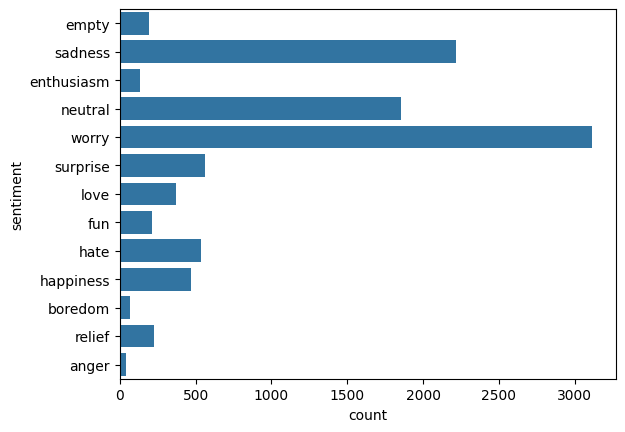

In [11]:
# Create a count plot to visualize the distribution of sentiment labels in the
# 'sentiment' column
sns.countplot(y='sentiment',data=data)

In [12]:
# Map sentiment labels to broader emotional categories using a predefined
# mapping. This creates a new column 'emotion' in the DataFrame based on the
# 'sentiment' column. The mapping is defined to group similar sentiments into
# categories like 'joy', 'anger', 'fear', etc.
emotion_mapping = {
    'empty': 'neutral',
    'sadness': 'sadness',
    'enthusiasm': 'joy',
    'neutral': 'neutral',
    'worry': 'fear',
    'surprise': 'surprise',
    'love': 'joy',
    'fun': 'joy',
    'hate': 'anger',
    'happiness': 'joy',
    'boredom': 'neutral',
    'relief': 'joy',
    'anger': 'anger'
}
data['emotion'] = data['sentiment'].map(emotion_mapping)
data.head(25)

,tweet_id,sentiment,content,emotion
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,neutral
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,sadness
2,1956967696,sadness,Funeral ceremony...gloomy friday...,sadness
3,1956967789,enthusiasm,wants to hang out with friends SOON!,joy
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,neutral
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...,fear
6,1956968487,sadness,"I should be sleep, but im not! thinking about ...",sadness
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down,fear
8,1956969035,sadness,@charviray Charlene my love. I miss you,sadness
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?,sadness


In [13]:
# Define a function to remove specific patterns from the input text.
# This function searches for occurrences of a given pattern and removes them
# from the text.
# Parameters:- input_txt: The text from which patterns will be removed,
# pattern: The regex pattern to search for and remove.
def remove_pattern(input_txt, pattern):
    # Find all occurrences of the pattern in the input text
    r = re.findall(pattern, input_txt)
    # Iterate through all found patterns and remove them from the text
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

# np.vectorize is used to apply the function to each element in the 'content'
# column.
data['cleaned_content'] = np.vectorize(remove_pattern)(data['content'], "@[\w]*")

In [14]:
# Define a mapping from emotional categories to numerical labels.
# This mapping assigns a unique integer to each emotion category for use in
# machine learning models.
label_mapping = {'joy': 0, 'sadness': 1, 'anger': 2, 'fear': 3, 'surprise': 4, 'neutral': 5}

# This creates a new column 'emotion_label' in the DataFrame with the numerical
# labels corresponding to the emotions.
data['emotion_label'] = data['emotion'].map(label_mapping)


In [15]:
# User handles
data['cleaned_content'].apply(nfx.remove_userhandles)

,cleaned_content
0,i know i was listenin to bad habit earlier a...
1,Layin n bed with a headache ughhhh...waitin o...
2,Funeral ceremony...gloomy friday...
3,wants to hang out with friends SOON!
4,We want to trade with someone who has Houston...
...,...
9995,is sadly sitting at home when she could be goi...
9996,I have tried. He doesn't want to listen. I do...
9997,lucky bitch! haha we have COLDDD rain up here...
9998,#twitterfails fucking hard right now...this is...


In [16]:
data.head(20)

,tweet_id,sentiment,content,emotion,cleaned_content,emotion_label
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,neutral,i know i was listenin to bad habit earlier a...,5
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,sadness,Layin n bed with a headache ughhhh...waitin o...,1
2,1956967696,sadness,Funeral ceremony...gloomy friday...,sadness,Funeral ceremony...gloomy friday...,1
3,1956967789,enthusiasm,wants to hang out with friends SOON!,joy,wants to hang out with friends SOON!,0
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,neutral,We want to trade with someone who has Houston...,5
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...,fear,Re-pinging : why didn't you go to prom? BC my ...,3
6,1956968487,sadness,"I should be sleep, but im not! thinking about ...",sadness,"I should be sleep, but im not! thinking about ...",1
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down,fear,Hmmm. http://www.djhero.com/ is down,3
8,1956969035,sadness,@charviray Charlene my love. I miss you,sadness,Charlene my love. I miss you,1
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?,sadness,I'm sorry at least it's Friday?,1


In [17]:
# download nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
# Text cleaning
def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)

    # Remove special characters and numbers
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d+", "", text)

    # Convert to lowercase
    text = text.lower()

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    filtered_text = [word for word in tokens if word not in stop_words]


    # Join the tokens back into a single string
    cleaned_text = " ".join(filtered_text)

    return cleaned_text


In [19]:
data['cleaned_content'].apply(clean_text)

,cleaned_content
0,know wa listenin bad habit earlier started fre...
1,layin n bed headache ughhhhwaitin call
2,funeral ceremonygloomy friday
3,want hang friend soon
4,want trade someone ha houston ticket one
...,...
9995,sadly sitting home could going partyyyyy
9996,tried doesnt want listen dont know anymore fee...
9997,lucky bitch haha colddd rain would give anythi...
9998,twitterfails fucking hard right nowthis annoying


In [20]:
data.head(20)

,tweet_id,sentiment,content,emotion,cleaned_content,emotion_label
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,neutral,i know i was listenin to bad habit earlier a...,5
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,sadness,Layin n bed with a headache ughhhh...waitin o...,1
2,1956967696,sadness,Funeral ceremony...gloomy friday...,sadness,Funeral ceremony...gloomy friday...,1
3,1956967789,enthusiasm,wants to hang out with friends SOON!,joy,wants to hang out with friends SOON!,0
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,neutral,We want to trade with someone who has Houston...,5
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...,fear,Re-pinging : why didn't you go to prom? BC my ...,3
6,1956968487,sadness,"I should be sleep, but im not! thinking about ...",sadness,"I should be sleep, but im not! thinking about ...",1
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down,fear,Hmmm. http://www.djhero.com/ is down,3
8,1956969035,sadness,@charviray Charlene my love. I miss you,sadness,Charlene my love. I miss you,1
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?,sadness,I'm sorry at least it's Friday?,1


In [21]:
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data['cleaned_content'], data['emotion_label'], test_size=0.2, random_state=42)

In [22]:
# Print the preprocessed train label
print(train_labels.head())

9254    3
1561    5
1670    5
6087    3
6669    1
Name: emotion_label, dtype: int64


In [23]:
# Print the preprocessed train data
print(train_data.head())

9254    feeling sorry for Ian. He broke up with his gf...
1561                                  : no i'm not going.
1670    Good night twitter friends - I'm nodding off a...
6087         Don't leave forever! We'll miss you too much
6669                           Young love comes to an end
Name: cleaned_content, dtype: object


# Feature Engineering

In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import hstack

In [25]:
# Initialize the vectorizers
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

In [26]:
# Fit and transform the training data
train_bow = count_vectorizer.fit_transform(train_data)
train_tfidf = tfidf_vectorizer.fit_transform(train_data)

In [27]:
# Transform the testing data
test_bow = count_vectorizer.transform(test_data)
test_tfidf = tfidf_vectorizer.transform(test_data)

In [28]:
# Concatenate the feature matrices
train_features = hstack([train_bow, train_tfidf])
test_features = hstack([test_bow, test_tfidf])

# Model and Evaluation

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [31]:
# Initialize the Naive Bayes classifier
classifier = MultinomialNB()

In [32]:
# Train the classifier
classifier.fit(train_features, train_labels)

MultinomialNB()

In [33]:
# Make predictions
predictions = classifier.predict(test_features)

In [34]:
# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
report = classification_report(test_labels, predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.325
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.06      0.11       295
           1       0.26      0.17      0.20       452
           2       0.25      0.01      0.02       120
           3       0.33      0.81      0.47       620
           4       0.00      0.00      0.00       104
           5       0.38      0.13      0.20       409

    accuracy                           0.33      2000
   macro avg       0.28      0.20      0.17      2000
weighted avg       0.32      0.33      0.25      2000



# CNN

In [36]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [37]:
# Reshape the feature matrices
train_features = np.expand_dims(train_features.toarray(), axis=2)
test_features = np.expand_dims(test_features.toarray(), axis=2)

In [38]:
#Define CNN Model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(train_features.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=6, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
#Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
# One-hot encode your labels
train_labels = to_categorical(train_labels, num_classes=6)

#Train the model
model.fit(train_features, train_labels, epochs=10, batch_size=32)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step - accuracy: 0.3212 - loss: 1.6369
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.6302 - loss: 1.0060
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 83ms/step - accuracy: 0.9019 - loss: 0.3510
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.9730 - loss: 0.1140
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 83ms/step - accuracy: 0.9866 - loss: 0.0632
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 82ms/step - accuracy: 0.9888 - loss: 0.0428
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 83ms/step - accuracy: 0.9917 - loss: 0.0344
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 83ms/step - accuracy: 0.9898 - loss: 0.0470
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.9896 - loss: 0.0344
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 83ms/step - accuracy: 0.9903 - loss: 0.0333


# LSTM

In [41]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [43]:
# Define LSTM model
# train_features is already a dense NumPy array, no conversion needed

# Reshape the data to a 3D format (samples, timesteps, features)
# Assuming each row in your array represents a sample and you want to treat each column as a timestep
train_features_reshaped = train_features.reshape(train_features.shape[0], train_features.shape[1], 1)
model = Sequential()
model.add(LSTM(units=128, input_shape=(train_features_reshaped.shape[1], train_features_reshaped.shape[2])))
model.add(Dense(units=6, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
#Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
# Train the model using the reshaped dense data
model.fit(train_features_reshaped, train_labels, epochs=10, batch_size=32)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 159s 621ms/step - accuracy: 0.3145 - loss: 1.6614
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 203s 633ms/step - accuracy: 0.3104 - loss: 1.6364
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 154s 614ms/step - accuracy: 0.3161 - loss: 1.6222
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 203s 618ms/step - accuracy: 0.3053 - loss: 1.6395
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 202s 619ms/step - accuracy: 0.3162 - loss: 1.6242
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 201s 615ms/step - accuracy: 0.3117 - loss: 1.6324
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 201s 611ms/step - accuracy: 0.3051 - loss: 1.6352
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 203s 615ms/step - accuracy: 0.3155 - loss: 1.6245
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 202s 615ms/step - accuracy: 0.3080 - loss: 1.6343
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 202s 614ms/step - accuracy: 0.3081 - loss: 1.6399


In [50]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# Assuming 'test_labels' is a pandas Series
# Reshape to 2D array for one-hot encoding
test_labels_reshaped = test_labels.values.reshape(-1, 1)

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
test_labels_encoded = encoder.fit_transform(test_labels_reshaped)

#Evaluvate the model using one-hot encoded labels
loss, accuracy = model.evaluate(test_features, test_labels_encoded)
print("Loss:", loss)
print("Accuracy:", accuracy)

63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 277ms/step - accuracy: 0.2979 - loss: 1.6342
Loss: 1.6318798065185547
Accuracy: 0.3100000023841858
